# **Introduction**
* A specific type of **feedforward** **neural networks where the input is**
**same as the output**.(same image in input and output)
* Mainly used to reduce the size of the inputs into a smaller
representation.**Compressing**
* The inputs is compressed into a lower-dimensional code and the
original data can be reconstructed from the **compressed data**.
* **The code is a compact summary of the input called as the latent**
**space representation**(without data loss).


# **Applications**
* Image Coloring
* Feature Extraction
* Image Denoising
* Watermark Removal

# **Architecture of Autoencoders**
Autoencoders have 3 layers:
1. Encoder
2. Code (Bottleneck)
3. Decoder


# **Encoder**:
Compresses the input into a **latent space representation**. Encoder
layers encodes the input image to a compressed representation in a
reduced dimension. **This will be a distorted version of the original**
**image**.

# **Code**:
Represents the compressed input which is fed to the decoder.**Latent Space** **representation**. The layer between the encoder and decoder (i.e., the code) is also known as **Bottleneck**. **This decides which aspects of observed data are**
**relevant and what aspects could be discarded.**


# **Decoder**:
Decodes the image back to the original dimension. This is a lossy reconstruction (slack of encoding) of the original image and is reconstructed from the latent space representation.


# **Properties of Autoencoders**:

1. **Data-specific**: Autoencoders are only able to compress data similar
to what they have been trained on. **They learn features specific for**
**the given training data**.

2. **Lossy**: Decompressed outputs will be degraded. It is not ideal for
lossless compression. What to be discarded is already decided in the encoding layers.

3. **Unsupervised**: Give the raw input data. They don’t need explicit
labels to train on. They can be called **self-supervised** since they
generate their own labels from the training data.


# **Hyperparameters of autoencoders**
* **Code size**: It is the number of nodes in the **middle layer**. **Smaller size**
**results in more compression**.
* **Number of layers**: It can consist of as many layers as we want
* **Number of nodes per layer**: It decreases with each subsequent layer of
the encoder and increases back in the decoder. **The decoder is symmetric**
**to the encoder in terms of layer structure.**
* **Loss function**: Either use 'mse' or 'binary cross-entropy'. **If input** **values in**
**range [0,1] typically cross-entropy is used otherwise mse.**

# **Types of autoencoders**
# 1.**Vanilla autoencoders :**
* Simplest of all encoders.
* They consist of only one hidden layer

# 2. **Deep autoencoders:**
* More hidden layers can be used in the autoencoder to reduce and
reconstruct the input.
* The hidden layers have a symmetry where we
keep reducing the dimensionality at each layer (the encoder) until we
get to the **encoding size**, then, we expand back up, **symmetrically**, to
the output size (the decoder).


# **3. Covolutional autoencoders:**
* Instead of using fully-connected layers, **convolutional and pooling**
layers are used to encode the input.
* **Autoencoders applied to images are convolutional.**
* The encoder section consists of **conv2D** and **maxpooling**
**(downsampling)** layers whereas the decoder section consists of
**conv2D** and **upsampling layers**

# **4. Regularized autoencoders:**
* Regularized autoencoders use a **loss function** that encourages the
model to have other **properties besides copying the input to the output**.
* 2 types of regularized autoencoders:

**(i). Sparse autoencoders**

**(ii). Denoising autoencoders**

# **(i).Sparse autoencoders:**

* The loss function is constructed in such a way that only a **few nodes are**
**activated when a single record is given to the network.**
* It penalizes the activations within a layer.
* **No need of reducing the number of nodes in the hidden layers**.
* Activating few nodes will guarantee that the network learns the **latent**
**information (essential information)** rather than redundant information.
* Useful in **dimensionality reduction**.
* The activated nodes of a trained model are **data dependent**, as different
inputs will result in activations of different nodes through the network.

# **(ii).Denoising autoencoders:**
* Denoising autoencoders **corrupts the data on purpose by randomly**
**turning some of the input values to zero**.
* Here, the training data and testing data are different.
* For the **training data, we add random, Gaussian noise**, and **test data**
**will be the original, clean image**.
* This trains the autoencoder to
produce clean images given noisy images.
* This is useful in **feature extraction and noise removal**.

# **Vanilla Autoencoders**

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

x_train=x_train.reshape((x_train.shape[0],28*28))
x_test=x_test.reshape((x_test.shape[0],28*28))

# Reshape each images from a (28,28) matrix to 28*28 vector
# The mnist images are 28x28 matrices, but for a autoencoder,
# we typically flatten the 2D images into 1D vector

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
INPUT_SIZE=784
ENCODING_SIZE=64
Input_img=Input(shape=(INPUT_SIZE,))

In [ ]:
encoded=Dense(ENCODING_SIZE,activation='relu')(Input_img)
decoded=Dense(INPUT_SIZE,activation='relu')(encoded)
autoencoded=Model(Input_img,decoded)

In [ ]:
autoencoded.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
autoencoded.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_split=0.2)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0085 - loss: 0.0561 - val_accuracy: 0.0102 - val_loss: 0.0174
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0123 - loss: 0.0155 - val_accuracy: 0.0126 - val_loss: 0.0122
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0126 - loss: 0.0117 - val_accuracy: 0.0140 - val_loss: 0.0104
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0128 - loss: 0.0102 - val_accuracy: 0.0135 - val_loss: 0.0096
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0145 - loss: 0.0094 - val_accuracy: 0.0133 - val_loss: 0.0092
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0148 - loss: 0.0090 - val_accuracy: 0.0132 - val_loss: 0.0089
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0149 - loss: 0.0088 - val_accuracy: 0.0144 - val_loss: 0.0087
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0140 - loss: 0.0086 - val_accuracy: 0

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
final['accuracy'][-1]

0.014354166574776173

In [ ]:
final['val_accuracy'][-1]

0.013916666619479656

In [ ]:
decoded_images=autoencoded.predict(x_test)
decoded_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 784)

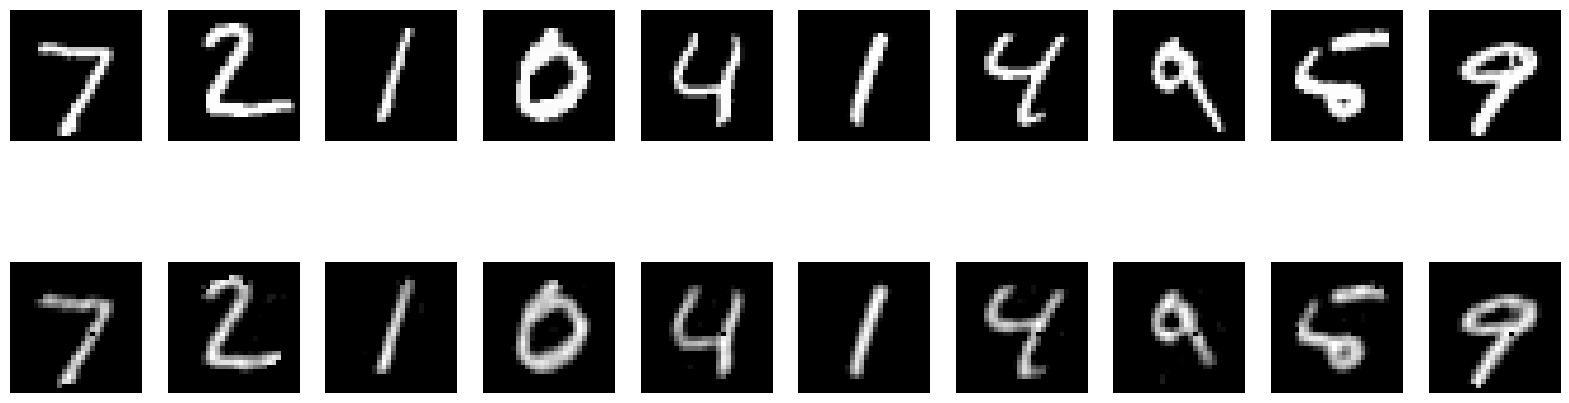

In [ ]:
plt.figure(figsize=(20,6))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(28,28))
  plt.gray()
  plt.axis('off')
plt.show()

# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Dropout,Input
from keras.datasets import fashion_mnist

In [ ]:
(x_train,_),(x_test,_)=fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

x_train=x_train.reshape((x_train.shape[0],28*28))
x_test=x_test.reshape((x_test.shape[0],28*28))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
INPUT_SIZE=784
ENCODING_SIZE=64
input_image=Input(shape=(INPUT_SIZE,))

In [ ]:
encoded=Dense(ENCODING_SIZE,activation='relu')(input_image)
decode=Dense(INPUT_SIZE,activation='relu')(encoded)
autoencoded=Model(input_image,decode)

In [ ]:
autoencoded.compile(loss='mse',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
autoencoded.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train,x_train,epochs=50,batch_size=250,shuffle=True,validation_split=0.2)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0039 - loss: 0.0744 - val_accuracy: 0.0119 - val_loss: 0.0289
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0146 - loss: 0.0265 - val_accuracy: 0.0192 - val_loss: 0.0223
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0214 - loss: 0.0214 - val_accuracy: 0.0232 - val_loss: 0.0198
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0261 - loss: 0.0192 - val_accuracy: 0.0270 - val_loss: 0.0183
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0321 - loss: 0.0178 - val_accuracy: 0.0318 - val_loss: 0.0174
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0329 - loss: 0.0171 - val_accuracy: 0.0353 - val_loss: 0.0169
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0342 - loss: 0.0166 - val_accuracy: 0.0344 - val_loss: 0.0162
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0366 - loss: 0.0160 - val_accuracy: 0.

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
final['accuracy'][-1]

0.045375000685453415

In [ ]:
final['val_accuracy'][-1]

0.04458333179354668

In [ ]:
decoded_images=autoencoded.predict(x_test)
decoded_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 784)

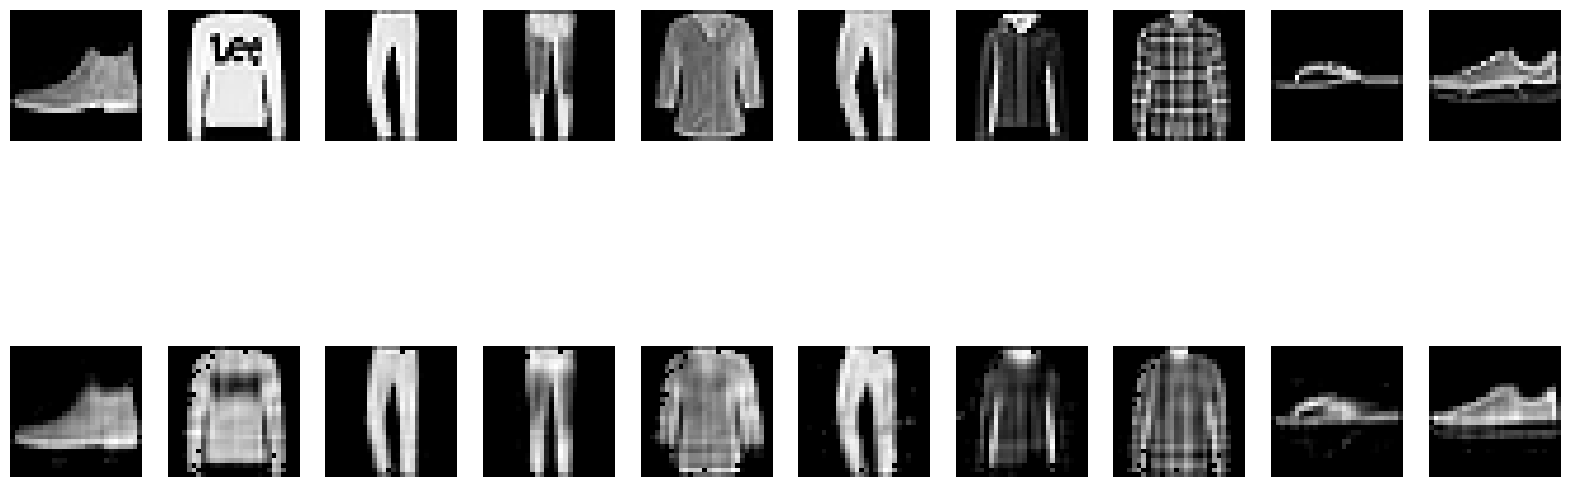

In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(28,28))
  plt.gray()
  plt.axis('off')
plt.show()

# **Example 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Input
from keras.datasets import cifar10

In [ ]:
(x_train,_),(x_test,_)=cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
x_train=x_train.reshape((x_train.shape[0],32*32*3))
x_test=x_test.reshape((x_test.shape[0],32*32*3))

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
INPUT_SIZE=3072
ENCODING_SIZE=1024
input_image=Input(shape=(INPUT_SIZE,))

In [ ]:
encoded=Dense(ENCODING_SIZE,activation='sigmoid')(input_image)
decoded=Dense(INPUT_SIZE,activation='sigmoid')(encoded)
autoencoded=Model(input_image,decoded)

In [ ]:
autoencoded.compile(loss='mse',optimizer=keras.optimizers.Adam())

In [ ]:
autoencoded.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3072)           │     3,148,800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,295,552 (24.02 MB)

 Trainable params: 6,295,552 (24.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train,x_train,batch_size=250,epochs=20,shuffle=True,validation_split=0.25)

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0427 - val_loss: 0.0199
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0179 - val_loss: 0.0159
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0137 - val_loss: 0.0116
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - val_loss: 0.0103
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - val_loss: 0.0078
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068 - val_loss: 0.0063
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/st

In [ ]:
final=f.history
final.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
final['loss'][-1]

0.005012634210288525

In [ ]:
final['val_loss'][-1]

0.007417946122586727

In [ ]:
decoded_images=autoencoded.predict(x_test)
decoded_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 3072)

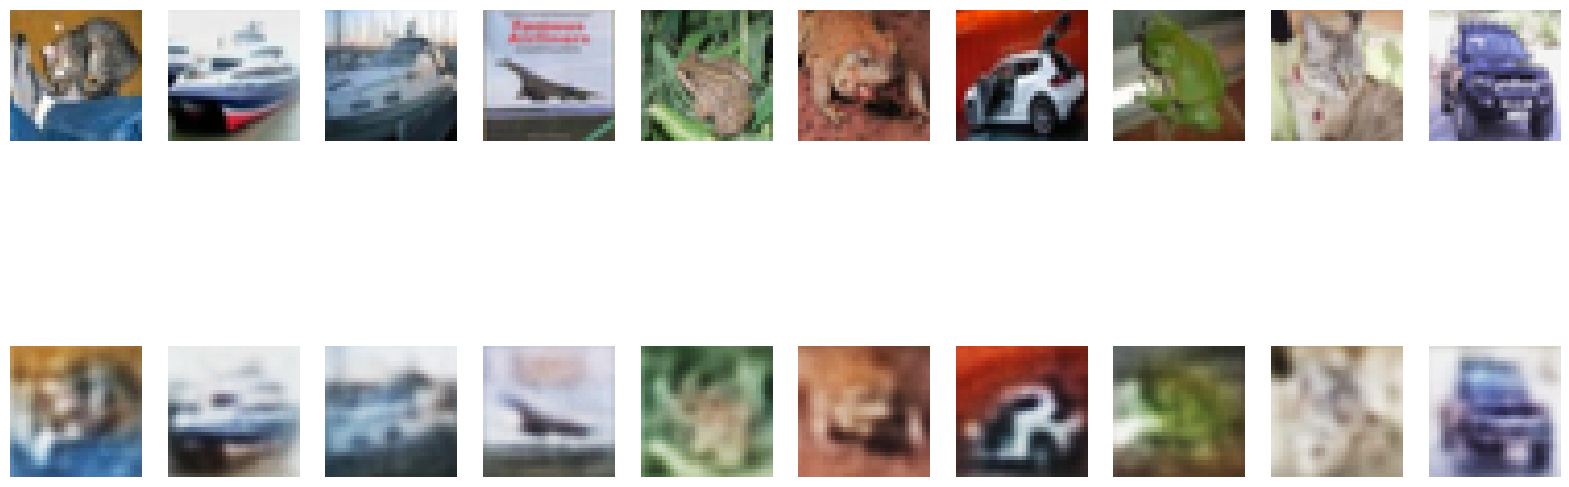

In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(32,32,3))
  plt.gray()
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(32,32,3))
  plt.gray()
  plt.axis('off')
plt.show()

# **Deep Autoencoder**

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input,Dense,Dropout
from keras.datasets import fashion_mnist

In [ ]:
(x_train,_),(x_test,_)=fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

x_train=x_train.reshape((x_train.shape[0],28*28))
x_test=x_test.reshape((x_test.shape[0],28*28))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
INPUT_SIZE=784
ENCODING_SIZE=64
input_image=Input(shape=(INPUT_SIZE,))

In [ ]:
encoded=Dense(512,activation='relu')(input_image)
encoded=Dense(256,activation='relu')(encoded)
encoded=Dense(128,activation='relu')(encoded)
encoded=Dense(ENCODING_SIZE,activation='relu')(encoded)

decoded=Dense(128,activation='relu')(encoded)
decoded=Dense(256,activation='relu')(decoded)
decoded=Dense(512,activation='relu')(decoded)
decoded=Dense(INPUT_SIZE,activation='relu')(decoded)

autoencoded=Model(input_image,decoded)

In [ ]:
autoencoded.compile(loss='mse',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
autoencoded.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,149,520 (4.39 MB)

 Trainable params: 1,149,520 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train,x_train,shuffle=True,epochs=25,batch_size=256,validation_split=.025)

Epoch 1/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0048 - loss: 0.0694 - val_accuracy: 0.0193 - val_loss: 0.0265
Epoch 2/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0147 - loss: 0.0246 - val_accuracy: 0.0207 - val_loss: 0.0216
Epoch 3/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0192 - loss: 0.0202 - val_accuracy: 0.0293 - val_loss: 0.0191
Epoch 4/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0254 - loss: 0.0184 - val_accuracy: 0.0273 - val_loss: 0.0169
Epoch 5/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0293 - loss: 0.0161 - val_accuracy: 0.0300 - val_loss: 0.0158
Epoch 6/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0336 - loss: 0.0151 - val_accuracy: 0.0293 - val_loss: 0.0152
Epoch 7/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0354 - loss: 0.0148 - val_accuracy: 0.0380 - val_loss: 0.0148
Epoch 8/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0347 - loss: 0.0143 - val_accuracy: 0

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
final['val_accuracy'][-1]

0.06133333221077919

In [ ]:
final['val_loss'][-1]

0.011489352211356163

In [ ]:
decoded_images=autoencoded.predict(x_test)
decoded_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 784)

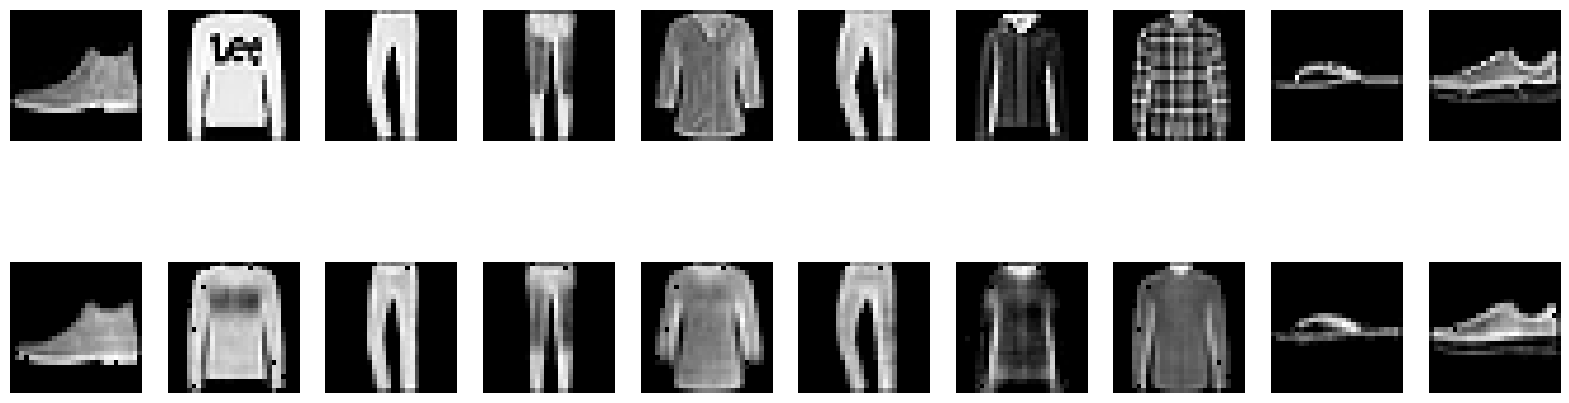

In [ ]:
plt.figure(figsize=(20,6))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(28,28))
  plt.gray()
  plt.axis('off')
plt.show()

# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Dense,Dropout
from keras.models import Model
from keras.datasets import mnist

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

x_train=x_train.reshape((x_train.shape[0],28*28))
x_test=x_test.reshape((x_test.shape[0],28*28))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
INPUT_SIZE=784
ENCODING_SIZE=64
input_image=Input(shape=(INPUT_SIZE,))

In [ ]:
encoded=Dense(1024,activation='relu')(input_image)
encoded=Dense(512,activation='relu')(encoded)
encoded=Dense(256,activation='relu')(encoded)
encoded=Dense(128,activation='relu')(encoded)
encoded=Dense(ENCODING_SIZE,activation='relu')(encoded)

decoded=Dense(128,activation='relu')(encoded)
decoded=Dense(256,activation='relu')(decoded)
decoded=Dense(512,activation='relu')(decoded)
decoded=Dense(1024,activation='relu')(decoded)
decoded=Dense(INPUT_SIZE,activation='relu')(decoded)

autoencoded=Model(input_image,decoded)

In [ ]:
autoencoded.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])

In [ ]:
autoencoded.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 784)            │       803,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,002,960 (11.46 MB)

 Trainable params: 3,002,960 (11.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train,x_train,epochs=25,batch_size=250,shuffle=True,validation_split=0.25)

Epoch 1/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0091 - loss: 0.0578 - val_accuracy: 0.0110 - val_loss: 0.0237
Epoch 2/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0113 - loss: 0.0211 - val_accuracy: 0.0111 - val_loss: 0.0165
Epoch 3/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0127 - loss: 0.0159 - val_accuracy: 0.0109 - val_loss: 0.0143
Epoch 4/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0126 - loss: 0.0135 - val_accuracy: 0.0143 - val_loss: 0.0134
Epoch 5/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0139 - loss: 0.0123 - val_accuracy: 0.0139 - val_loss: 0.0119
Epoch 6/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0132 - loss: 0.0113 - val_accuracy: 0.0136 - val_loss: 0.0117
Epoch 7/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0125 - loss: 0.0107 - val_accuracy: 0.0145 - val_loss: 0.0111
Epoch 8/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0138 - loss: 0.0101 - val_accuracy: 0.

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
final['val_accuracy'][-1]

0.014933333732187748

In [ ]:
final['val_loss'][-1]

0.007877396419644356

In [ ]:
decoded_images=autoencoded.predict(x_test)
decoded_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 784)

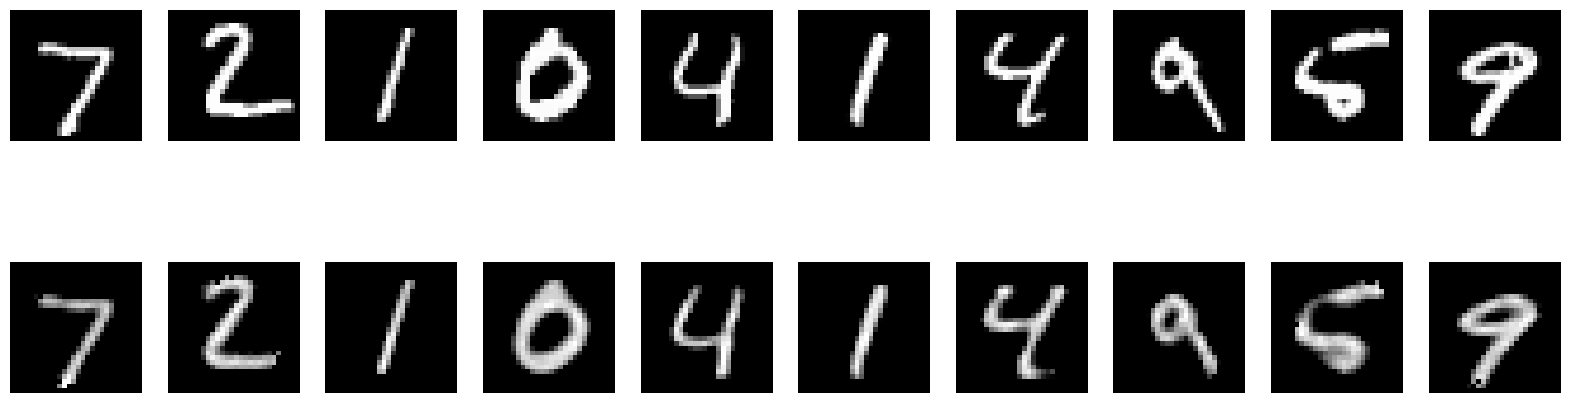

In [ ]:
plt.figure(figsize=(20,6))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(28,28))
  plt.gray()
  plt.axis('off')
plt.show()

# **Convolutional Autoencoder**

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,UpSampling2D
from keras.datasets import mnist

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
autoencoded=Sequential()

# Encoder
autoencoded.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
autoencoded.add(MaxPool2D(pool_size=(2,2),padding='same'))
autoencoded.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoded.add(MaxPool2D(pool_size=(2,2),padding='same'))
autoencoded.add(Conv2D(8,(3,3),activation='relu',padding='same'))

# Decoder
autoencoded.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoded.add(UpSampling2D(size=(2,2)))
autoencoded.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoded.add(UpSampling2D(size=(2,2)))
autoencoded.add(Conv2D(32,(3,3),activation='relu',padding='same'))

autoencoded.add(Conv2D(1,(3,3),activation='relu',padding='same'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
autoencoded.compile(loss='mse',optimizer=keras.optimizers.Adam())

In [ ]:
autoencoded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train,x_train,epochs=25,batch_size=256,validation_split=0.25,shuffle=True)

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0434 - val_loss: 0.0105
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0068 - val_loss: 0.0061
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 8/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 9/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 11/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 12/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
final=f.history
final.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
final['val_loss'][-1]

0.0026547855231910944

In [ ]:
decoded_images=autoencoded.predict(x_test)
decoded_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 28, 28, 1)

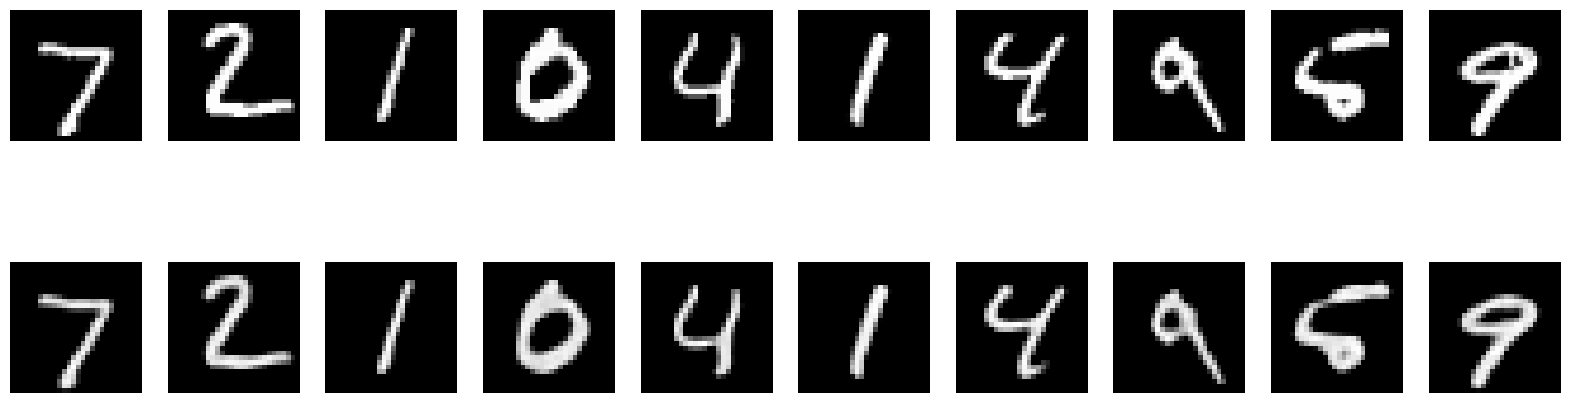

In [ ]:
plt.figure(figsize=(20,6))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(28,28,1))
  plt.gray()
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(28,28,1))
  plt.gray()
  plt.axis('off')
plt.show()

# **Regularised Autoencoders**

# **1. Sparse Autoencoders**

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

x_train=x_train.reshape(x_train.shape[0],28*28)
x_test=x_test.reshape(x_test.shape[0],28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
INPUT_SIZE=784
ENCODING_SIZE=64
input_image=Input(shape=(INPUT_SIZE,))

In [ ]:
encoded=Dense(ENCODING_SIZE,activation='relu',activity_regularizer=regularizers.L2(10e-5))(input_image)
decoded=Dense(INPUT_SIZE,activation='sigmoid')(encoded)
autoencoded=Model(input_image,decoded)

In [ ]:
autoencoded.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
autoencoded.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train,x_train,batch_size=256,epochs=45,shuffle=True,validation_split=0.25)

Epoch 1/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0117 - loss: 0.6894 - val_accuracy: 0.0149 - val_loss: 0.6325
Epoch 2/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0138 - loss: 0.5804 - val_accuracy: 0.0160 - val_loss: 0.4335
Epoch 3/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0182 - loss: 0.4138 - val_accuracy: 0.0175 - val_loss: 0.3719
Epoch 4/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0167 - loss: 0.3630 - val_accuracy: 0.0202 - val_loss: 0.3367
Epoch 5/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0167 - loss: 0.3288 - val_accuracy: 0.0196 - val_loss: 0.3094
Epoch 6/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0175 - loss: 0.3030 - val_accuracy: 0.0209 - val_loss: 0.2880
Epoch 7/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0166 - loss: 0.2830 - val_accuracy: 0.0182 - val_loss: 0.2710
Epoch 8/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0153 - loss: 0.2676 - val_accuracy: 0

In [ ]:
decoded_images=autoencoded.predict(x_test)
decoded_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 784)

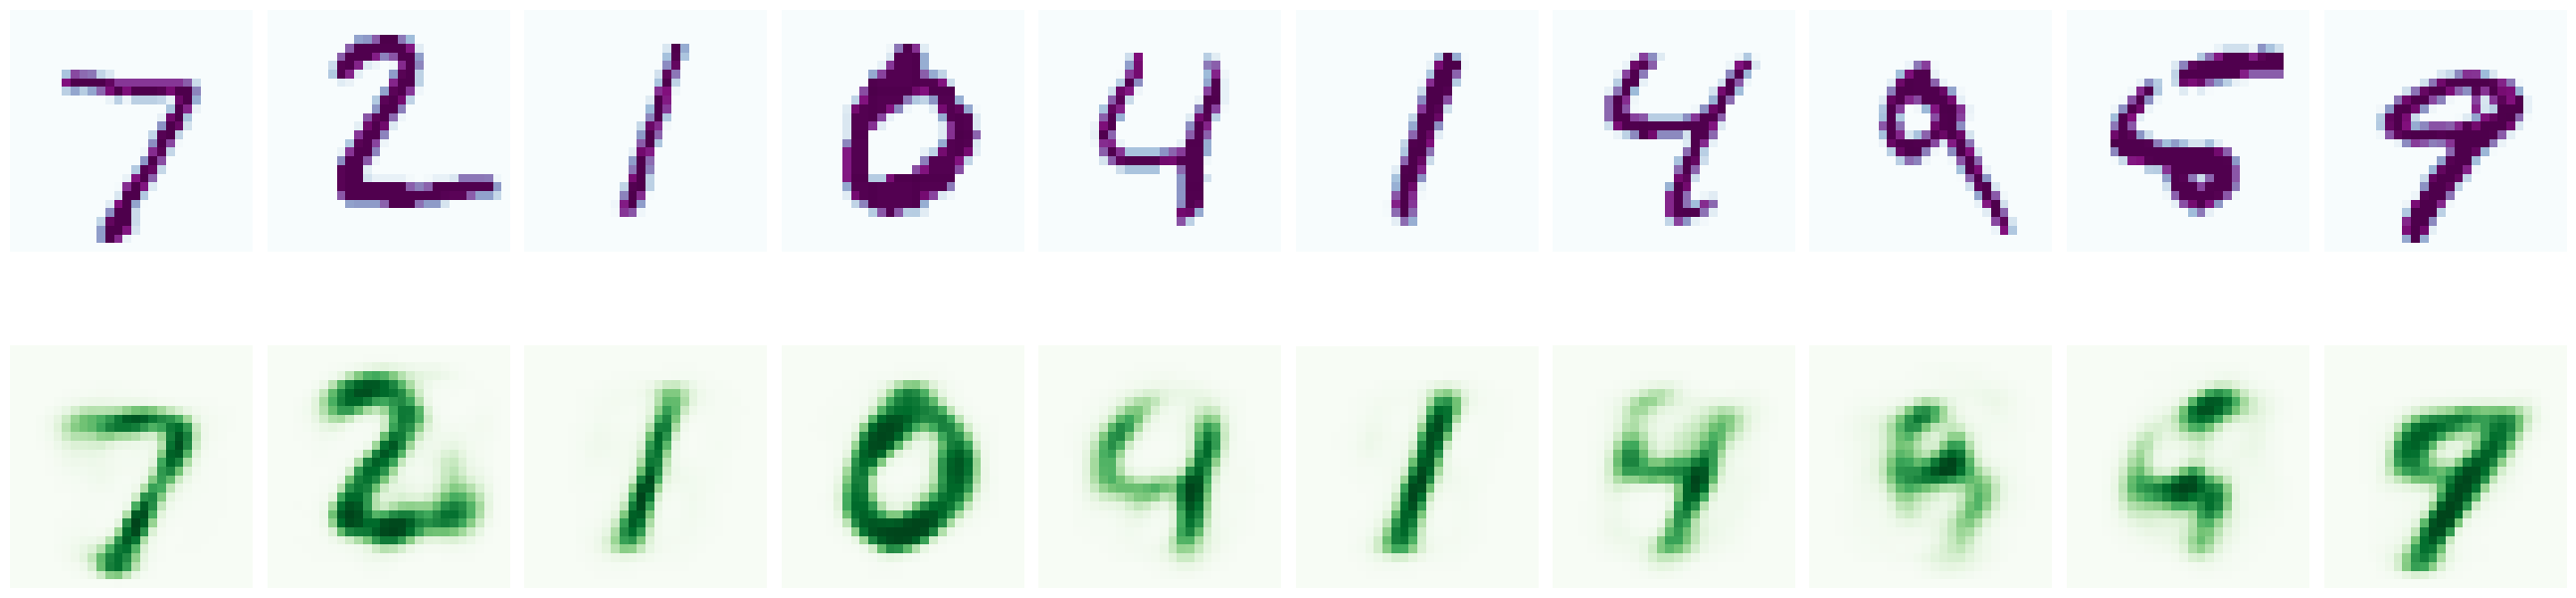

In [ ]:
plt.figure(figsize=(26,8))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='BuPu')
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(28,28),cmap='Greens')
  plt.axis('off')
plt.tight_layout()
plt.show()

# **2. Denoising Autoencoders**

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D,UpSampling2D,Input,MaxPooling2D

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(_.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Adding Gaussian Noise
noise_factor=0.5 # optimal range 0-1
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
                                                  # starting , Ending
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)

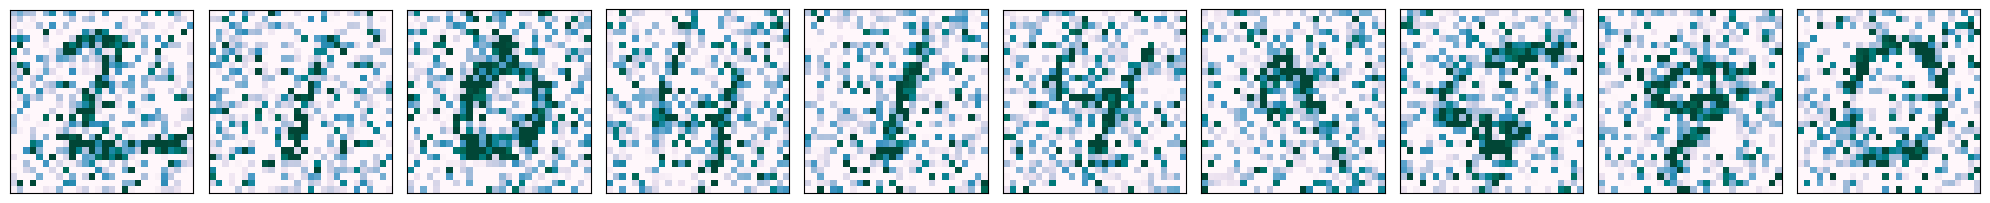

In [ ]:
# Visualizing noisy import
n=10
plt.figure(figsize=(20,3))
for i in range(1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='PuBuGn')
  #plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
input_image=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_image)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded=MaxPooling2D((2,2),padding='same')(x)

x=Conv2D(32,(3,3),activation='relu',padding='same')(encoded)

x=UpSampling2D((2,2))(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=UpSampling2D((2,2))(x)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
autoencoded=Model(input_image,decoded)

In [ ]:
autoencoded.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
autoencoded.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=autoencoded.fit(x_train_noisy,x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7935 - loss: 0.2719 - val_accuracy: 0.8101 - val_loss: 0.1173
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8106 - loss: 0.1160 - val_accuracy: 0.8106 - val_loss: 0.1094
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8114 - loss: 0.1098 - val_accuracy: 0.8108 - val_loss: 0.1063
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8125 - loss: 0.1066 - val_accuracy: 0.8107 - val_loss: 0.1047
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8125 - loss: 0.1044 - val_accuracy: 0.8120 - val_loss: 0.1022
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8127 - loss: 0.1025 - val_accuracy: 0.8116 - val_loss: 0.1009
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8132 - loss: 0.1012 - val_accuracy: 0.8118 - val_loss: 0.1000
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8127 - loss: 0.1007 - val_accuracy: 0

In [ ]:
decoded_images=autoencoded.predict(x_test_noisy)
decoded_images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[[[4.0539489e-05],
         [1.0957584e-05],
         [2.5218546e-06],
         ...,
         [6.2676818e-06],
         [1.9015784e-05],
         [3.6083834e-04]],

        [[7.2038338e-06],
         [7.3596666e-06],
         [1.1165968e-06],
         ...,
         [8.1283144e-07],
         [6.4748178e-07],
         [1.2451662e-05]],

        [[2.6842233e-07],
         [3.9937598e-07],
         [6.0568163e-07],
         ...,
         [1.0458600e-06],
         [5.3825971e-07],
         [4.9247296e-06]],

        ...,

        [[4.2816905e-06],
         [1.2238891e-06],
         [1.2672888e-06],
         ...,
         [9.9082217e-06],
         [9.7592629e-06],
         [5.7698394e-06]],

        [[3.7099075e-05],
         [4.6668592e-06],
         [4.8106813e-06],
         ...,
         [1.2155164e-05],
         [1.5610211e-05],
         [1.2649194e-05]],

        [[5.5932911e-04],
         [4.4359305e-05],
         [3.9601939e-05],
         ...,
         [5.1269773e-05],
        

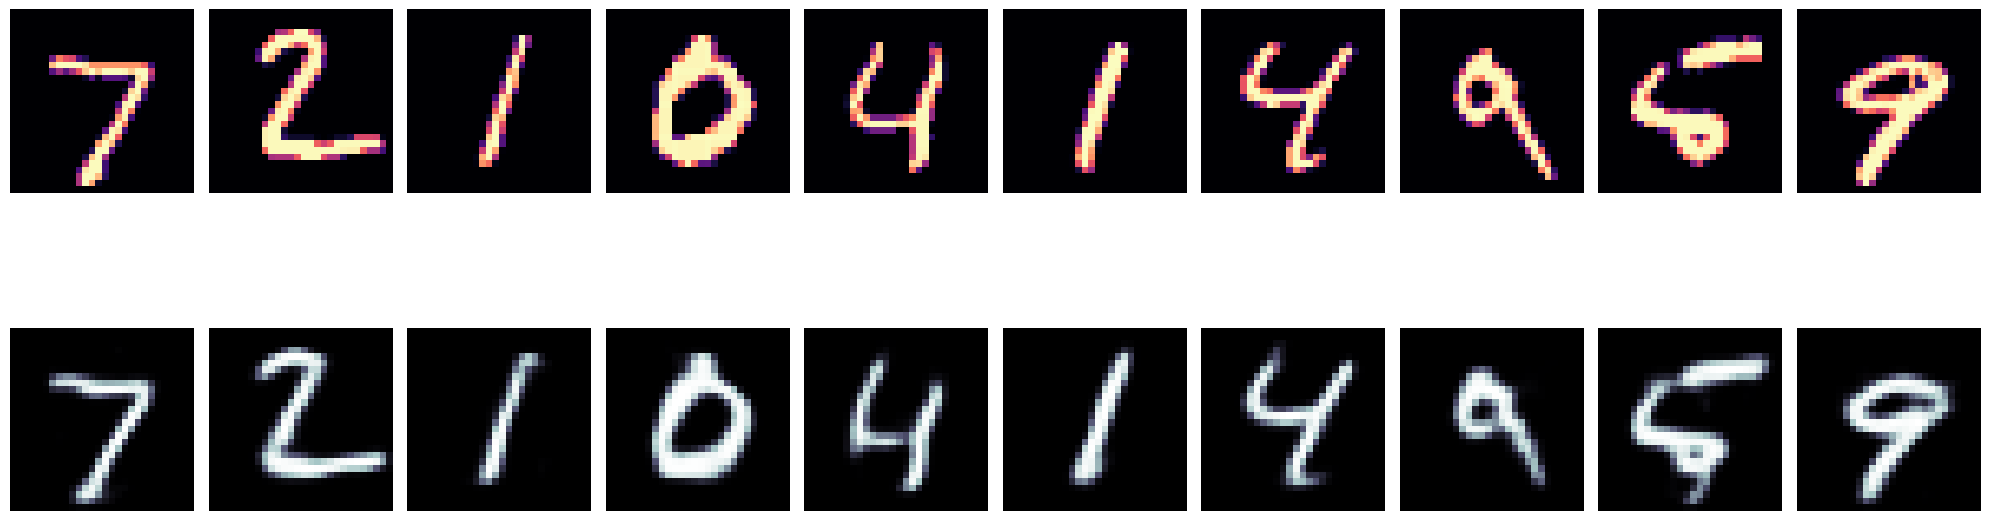

In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='magma')
  plt.axis('off')

  plt.subplot(2,10,i+11)
  plt.imshow(decoded_images[i].reshape(28,28),cmap='bone')
  plt.axis('off')
plt.tight_layout()
plt.show()